# 1. Regression models

Regression refers to a mathematical problem which consists in predicting a continuous dependent variable using a set of independent ones, i.e. finding the model $f$ such that our target $y$ is given in terms of variables $x_i$ as
$y=f(x_0,...x_i)$.

As $f$ can be either a linear or non-linear function, the regression models divide natively into these two classes, linear and nonlinear ones.

In [24]:
global p
p=1

def fc(p):
    p=3
    print(p)

In [25]:
p

1

In [10]:
#import libraries
import pandas as pd
import numpy as np
import sklearn
from matplotlib.pyplot import *

#import dataset
dataset = pd.read_csv('LR_practice_data.csv', delimiter=';',decimal=',')
dataset.head()

,x1,x2,x3,x4,y
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [11]:
#define X and y

# X to be used as independent variables
X = dataset.drop(['y'],axis=1).values

# y to be predicted (targets) 
y = dataset['y'].values

## 1.1.Linear regression with a single variable (univariate)

The most trivial regression problem is the univariate linear regression, which corresponds to finding parameters $m$ and $b$ such that $y=mx+b$. These are found by minimizing a loss function, typically the MSE. Though the parameter $b$ and $m$ are usually referred as intercept and slope, in the context of Machine Learning(ML) they are usually called bias and weights.

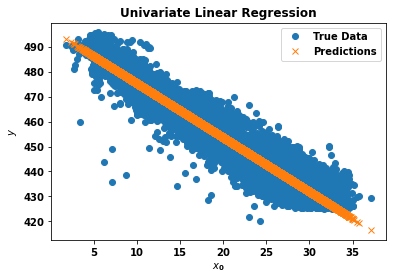

In [14]:
#import the linear model from sklearn library
from sklearn import linear_model

#define the model
univariate_model = sklearn.linear_model.LinearRegression()

#fit the model
x_train = X[:,0].reshape(-1,1)
y_train = y
univariate_model.fit(x_train,y_train)

#predictions
y_predictions = univariate_model.predict(x_train)

#plot the results
subplots()
plot(x_train,y_train,'o',label='True Data')
plot(x_train,y_predictions,'x',label='Predictions')
xlabel(r"$x_0$")
ylabel(r"$y$")
title("Univariate Linear Regression")
legend()

## 1.2. Linear regression with multiple variables

A second type of linear regression is the multivariate linear regression, which corresponds to finding parameters $m_i$ and $b$ such that $y=\sum m_i x_i +b$.

Text(0.5, 1.0, 'Multivariate Linear Regression')

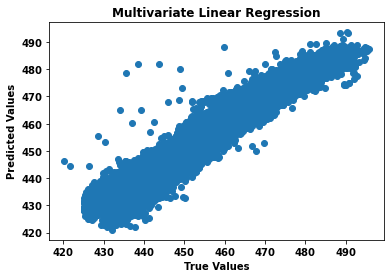

In [6]:
#define the model
multivariate_model = sklearn.linear_model.LinearRegression()

#fit the model
x_train = X
y_train = y
multivariate_model.fit(x_train,y_train)

#predictions
y_predictions = multivariate_model.predict(x_train)

#plot the results
subplots()
plot(y_train,y_predictions,'o')
xlabel('True Values')
ylabel('Predicted Values')
title("Multivariate Linear Regression")

In [17]:
multivariate_model.coef_

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

## 1.3 Ridge Regression

The Ridge regression works similarly to the multivariate linear regression but aims to regularize it by adding a penalization to large value weights. Thus, if the least squares approach aims to minimize the residuals

$\frac{\partial}{\partial m_i}(\sum{(y_i-m_ix_i)^2}) = 0$

the ridge regression minimizes

$\frac{\partial}{\partial m_i}(\sum{(y_i-m_ix_i)^2} + \lambda \sum{m_i^2}) = 0$

instead, thus penalizing large values of $m_i$ weigths.

[-1.97749177 -0.23392451  0.06208831 -0.15805053]


Text(0.5, 1.0, 'Ridge Regression')

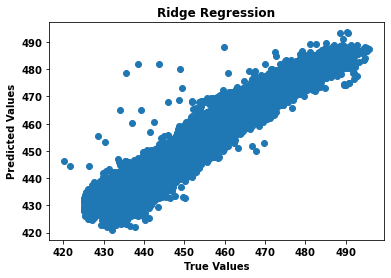

In [7]:
#define the model
ridge_model = sklearn.linear_model.Ridge(alpha=1)

#fit the model
x_train = X
y_train = y
ridge_model.fit(x_train,y_train)

print(ridge_model.coef_)

#predictions
y_predictions = ridge_model.predict(x_train)

#plot the results
subplots()
plot(y_train,y_predictions,'o')
xlabel('True Values')
ylabel('Predicted Values')
title("Ridge Regression")

In [10]:
X.shape

(9568, 4)

array([0.62989873, 0.29283616, 0.06140992, 0.01585519])

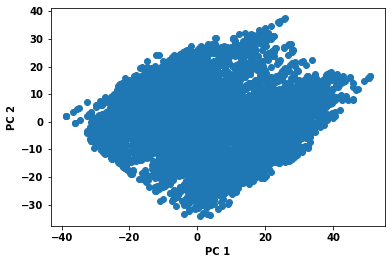

In [20]:
from sklearn import decomposition

pca_model = sklearn.decomposition.PCA(n_components=4)

pca_model.fit(X)
pcs = pca_model.transform(X)

fig, ax = subplots()
ax.plot(pcs[:,0],pcs[:,1],'o')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

pca_model.explained_variance_ratio_

## 1.4 Principal Components Regression

The starting point of the method is the principal component analysis, i.e. the decomposition (factorization) of the data $X$ into a product of scores $T$ (relationship of samples) and loadings $P$ (relationship of variables) as 

$X = TP^t+e$ 

with $e$ being a stochastic error.
The loadings (principal components, vectors) $P$ are determined by determining the eigenvectors of the covariance matrix $X^TX$ (if $X$ has zero mean) associated with the $n$ highest eigenvalues ($n$ principal components).

The idea of principal components regression is to use the PC scores $T$ for the regression task, which features has advantages the i)reduced dimensionality and the ii)possibility to workaround collinear variables.

Text(0.5, 1.0, 'Partial Least Squares')

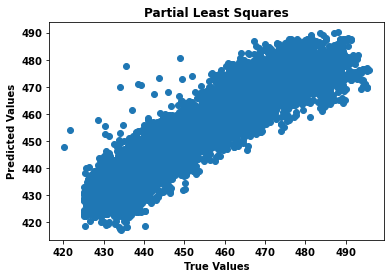

In [32]:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import pipeline

# Principle components regression
steps = [
    ('scale', sklearn.preprocessing.StandardScaler()),
    ('pca', sklearn.decomposition.PCA()),
    ('estimator', sklearn.linear_model.LinearRegression())
]

pipe = sklearn.pipeline.Pipeline(steps)

pca_model = pipe.set_params(pca__n_components=2)

#fit the model
x_train = X
y_train = y
pca_model.fit(x_train,y_train)

#predictions
y_predictions = pca_model.predict(x_train)

#plot the results
subplots()
plot(y_train,y_predictions,'o')
xlabel('True Values')
ylabel('Predicted Values')
title("Partial Least Squares")

## 1.5 Partial Least Squares

PLS regression aims to improve the PCR by introducing information regarding the relation of the targets $Y$ and the variables $X$. In short, the decomposition performed is not realized in the covariance space but instead in the correlation between the two, $X^TY$. The model starts by decomposing both $X$ and $Y$ in two distinct basis

$X=TP^T$

$Y=UQ^T$

where the basis $P$ and $Q$ are obtained to maximize the covariance between $T$ and $U$. The regression is obtained by first fitting $\beta$ $U=T\beta$ and then

$Y=UQ^T=T\beta Q^T= X P \beta Q^T$.

You can choose the number of latent variables (i.e. dimensions of the basis $Q$ and $P$).

Text(0.5, 1.0, 'Partial Least Squares')

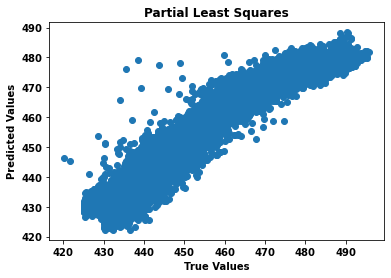

In [36]:
from sklearn import cross_decomposition

#define the model
pls_model = sklearn.cross_decomposition.PLSRegression(n_components=2)

#fit the model
x_train = X
y_train = y
pls_model.fit(x_train,y_train)

#predictions
y_predictions = pls_model.predict(x_train)

#plot the results
subplots()
plot(y_train,y_predictions,'o')
xlabel('True Values')
ylabel('Predicted Values')
title("Partial Least Squares")

## 1.6 Multilayer perceptron 

Text(0.5, 1.0, 'Multi-layer percepton neural networks')

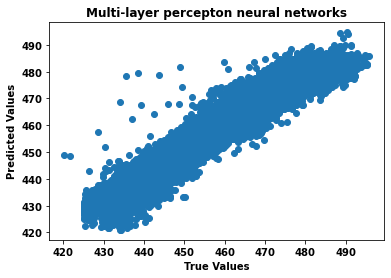

In [34]:
from sklearn import neural_network

#define the model
mlp_model = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=400)

#fit the model
x_train = X
y_train = y
mlp_model.fit(x_train,y_train)

#predictions
y_predictions = mlp_model.predict(x_train)

#plot the results
subplots()
plot(y_train,y_predictions,'o')
xlabel('True Values')
ylabel('Predicted Values')
title("Multi-layer percepton neural networks")

# 2. Evaluating the models

In regression tasks the model can be evaluated by analyzing the preditiction error (also called as residuals), looking for the existence of patterns or bias. Yet, when you have hundred or million points, this task can become impracticable, and one needs to resort to some summary metrics which condenses the information into a single value.

### 2.1 Mean Absolute Error (MAE)

It is given as the average of the absolute differentes between the actual and the predicted value, i.e.
$MAE = \frac{1}{N}\sum |y_i^t-y_i|$, with $y_i^t$ being the true and $y_i$ the predicted values.

Note that MAE has the same units of the data and therefore can only offer information which depend on the problem being explored.

In [38]:
def mean_absolute_error(targets, predictions):
    
    MAE = 0
        
    for i in range(0,len(targets)):
        MAE += np.abs(targets[i]-predictions[i])
        
    return MAE/len(targets)
    

In [39]:
models_tested = [univariate_model,multivariate_model,
                 ridge_model,pca_model,pls_model,mlp_model]

#fit the model
x_train = X
y_train = y



for i in range(len(models_tested)):
    #predictions
    if i == 0:  
        y_predicted = models_tested[i].predict(x_train[:,0].reshape(-1,1))
    
    else:
        y_predicted = models_tested[i].predict(x_train)

    MAE = mean_absolute_error(y_train, y_predicted)
    
    print('Mean Absolue Error -> ', models_tested[i], MAE)

Mean Absolue Error ->  LinearRegression() 4.287981894101458
Mean Absolue Error ->  LinearRegression() 3.6252158076011844
Mean Absolue Error ->  Ridge(alpha=1) 3.6252178726796576
Mean Absolue Error ->  Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=2)),
                ('estimator', LinearRegression())]) 5.364407728627967
Mean Absolue Error ->  PLSRegression() [4.15007109]
Mean Absolue Error ->  MLPRegressor(hidden_layer_sizes=400) 4.023129447593617


### 2.2 Mean Squared Error (MSE)

The MSE is the same of MAE but with squared differences, i.e.
$MSE = \frac{1}{N}\sum |y_i^t-y_i|^2$.
As MSE squares the residuals, a bad prediction has its effect penalized, making this evaluation metric not robust to outliers. Indeed, it can easily overestimate the model error with a single bad prediction. On the other hand, if the errors are below 1, the model error can be underestimated.

### 2.3 Root Mean Squared Error (RMSE)

It is the root of the MSE,
$RMSE = \sqrt{ \frac{1}{N}\sum |y_i^t-y_i|^2 } $, having similar issues as the MSE.

### 2.4 Mean Absolute Percentage Error (MAPE)

MAPE is also a measure of prediction accuracy which is given by
$MAPE = \frac{100}{N}\sum{\frac{y_i^t-y_i}{y_i^t}}$. In spite being interesting because it can solve the issue of penalizing the outliers, MAPE also presents somes challenges if the scales are distinct or for negative values, and many alternatives have been suggested to workaround these issues.

### 2.5 Max Error (ME)

Corresponds to the worst error detected for all the predictions.

### 2.6 $R^2$ Score

The $R^2$ score is a metric that instead of describing the accuracy by analyzing the residuals population, it focus on determining how the variance of one variable explains the variance of the predictions. Thus, it is a popular metric for estimating the accuracy of the model, ranging from $-\infty$ to 1, with 1 being the perfect model, 0 the same as a random one, and below, corresponding to a situation where the regression model is completely wrong.
$R^2 = 1 - \frac{\sum{(y_i^t-y_i)^2}}{\sum{(y_i-y_{mean})^2}}$

## 3. Split the dataset in training set and test set

So far we have evaluated the performance of the model in a single dataset, which we used to train and test the model. But in real scenarios, the task is to make predictions of each the model does not know nothing about them. In this sense, it is important to divide the dataset into two distinct sets: a train and a test set. The train set is used for training and validating the model, while the test set provides a measure for its accuracy.

In [53]:
def test_all_models(models, x, y):
    pass
    

In [69]:
pd.DataFrame([[pls_model,MAE_train,MAE_test]],columns=['model','MAE train', 'MAE test'])

,model,MAE train,MAE test
0,PLSRegression(),[4.153699780041246],[4.077622077539425]


[4.15369978]
[4.07762208]


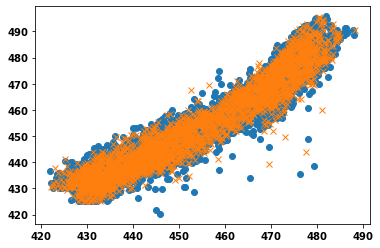

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

subplots()
pls_model.fit(X_train, y_train)
train_predicts = pls_model.predict(X_train)
test_predicts = pls_model.predict(X_test)
plot(train_predicts,y_train,'o')
plot(test_predicts, y_test,'x')

MAE_train = mean_absolute_error(y_train, train_predicts)
MAE_test = mean_absolute_error(y_test, test_predicts)
print(MAE_train)
print(MAE_test)

In [74]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    print(train_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

[3190 3191 3192 ... 9565 9566 9567]
[   0    1    2 ... 9565 9566 9567]
[   0    1    2 ... 6376 6377 6378]


5